# Optical Character Recognition (OCR)

## Install & Import Python libraries

In [1]:
# Libraries
import os
import re
import cv2
import PIL
import nltk
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# Print versions of libraries
print("Version of package cv2:", cv2.__version__)
print("Version of package re:", re.__version__)
print("Version of package pytesseract:", pytesseract.__version__)
print("Version of package nltk:", nltk.__version__)
print("Version of PIL:", PIL.__version__, "\n")

# Specify the path to Tesseract
# pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print(os.getcwd())

Version of package cv2: 4.10.0
Version of package re: 2.2.1
Version of package pytesseract: 0.3.13
Version of package nltk: 3.9.1
Version of PIL: 10.4.0 

u:\Lektionen\GitHub_Repositories\python_data_preparation


## Read and plot digital image of the receipt

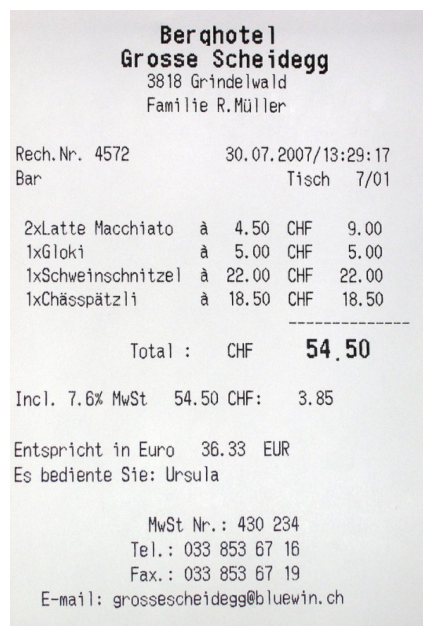

In [38]:
# Import receipt
img = cv2.imread('./Data/receipt.png')

# Functionto plot image
def plot_image(img, base_height=10):

    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Define base height and calculate aspect ratio
    height, width = img.shape[:2]
    aspect_ratio = width / height
    figsize = (base_height * aspect_ratio, base_height)

    # Plot image of receipt
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Plot image of receipt
plot_image(img, 8)

## Image processing to improve the image quality

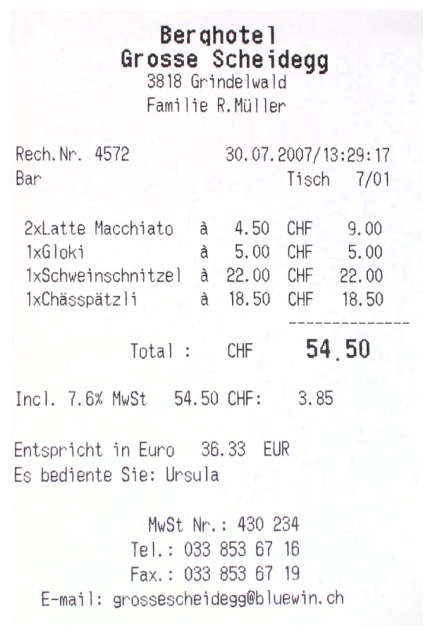

In [39]:
# Increase brightness function
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

# Improve image quality step by step
img_01 = cv2.imread('./Data/receipt.png')
img = increase_brightness(img_01, value=30) 

# Plot image of receipt
plot_image(img, 8)

## Getting boxes around the text

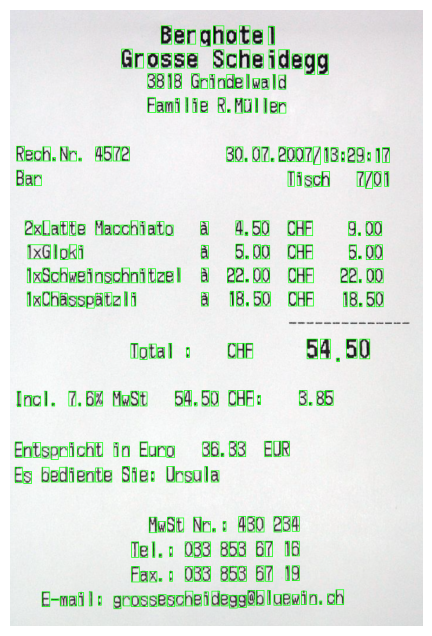

In [40]:
# Import the receipt image
img = cv2.imread('./Data/receipt.png')

 # Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Get image dimensions
h, w, c = img.shape

# Get OCR boxes
boxes = pytesseract.image_to_boxes(img, lang='deu')

# Draw boxes on the image
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 1)

# Get OCR data
d = pytesseract.image_to_data(img, output_type=Output.DICT, lang='deu')

# Plot image of receipt
plot_image(img, 8)

## Template Matching

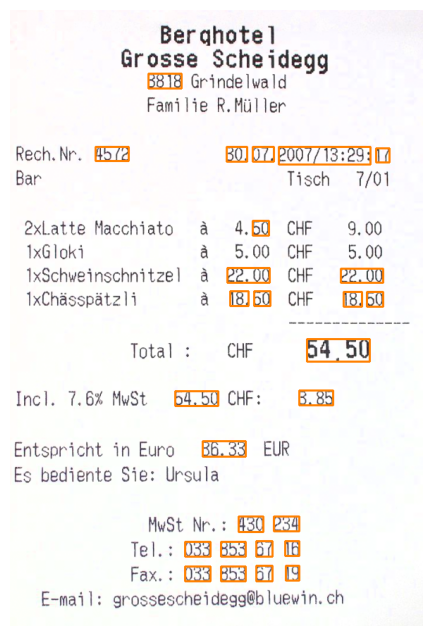

In [41]:
img_01 = cv2.imread('./Data/receipt.png')
img    = increase_brightness(img_01, value=30)

d = pytesseract.image_to_data(img, output_type=Output.DICT, lang='deu')
keys = list(d.keys())
vals = list(d.values())

# Mark all numbers using regexpression
pattern = '[0-9][0-9]'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) >= 20:
        if re.match(pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,128,255), 2)

# Plot image of receipt
plot_image(img, 8)

## Print content of boxes around the text

In [42]:
# Total number of text-boxes
# print(n_boxes)

# Boxes
boxes = pytesseract.image_to_boxes(img, lang='deu')
print(boxes[0:180])

# Keys
# print(d.keys())

# Values
list(d.values())[11][17:21]

B 214 827 229 853 0
e 233 827 247 848 0
r 251 827 263 847 0
q 270 824 284 847 0
h 288 827 303 853 0
o 307 827 321 847 0
t 325 827 340 853 0
e 344 827 358 847 0
l 366 826 375 852 0



['Rech.', 'Nr.', '4572', '30.']

In [43]:
def replace_chars(text):
    """
    Replaces all characters instead of numbers from 'text'.
    :param text: Text string to be filtered
    :return: Resulting number
    """
    list_of_numbers = re.findall(r'\d+', text)
    result_number = '|'.join(list_of_numbers)
    return result_number

ocr_result = pytesseract.image_to_string(Image.open('./Data/receipt.png'), lang='deu')

print(ocr_result)

Berqhotel
Grosse Scheidegg
3818 Grindelwald
Familie R.Müller

Rech. Nr. 4572 30.07.2007/13:29:17
Bar Tisch 7/01
2><Latte Macchiato & 4. 50 CHF 9. 00
lelok1' & 5.00 CHF 5.00
1xSchweinschnitze\ ?: 22.00 CHF 22.00
1><Chässpätz H a 18. 50 CHF 18. 50

Total : CHF 54 ‚ 50
Inc]. 7.8% MwSt 54.50 CHF: 3.85

Entspricht in Euro 36. 33 EUR
Es bediente Sie: Ursula

MwSt Nr.: 430 234
Tel.: 033 853 67 15
Fax.: 033 853 67 @
E—mai ] : grossescheidegglbluewin. ch



## Write Text to File

In [44]:
parse_text = []
word_list  = []
last_word  = ''

for word in d['text']:
    if word!='':
        word_list.append(word)
        last_word = word
    if (last_word!='' and word == '') or (word==d['text'][-1]):
        parse_text.append(word_list)
        word_list = []

print(parse_text[1:4])

# Write to .csv-file
import csv
with open('./Data/result_text.txt',  'w', newline="") as file:
          csv.writer(file, delimiter=" ").writerows(parse_text)

[['Grosse', 'Scheidegg'], ['38l8', 'Grindelwald'], ['Familie', 'R.Müller']]


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 11
Datetime: 2024-10-20 10:23:38
Python Version: 3.12.4
-----------------------------------
